In [575]:
import pandas as pd

In [577]:
df = pd.read_csv('bengaluru_house_prices.csv')

In [579]:
df.shape

(13320, 9)

In [581]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [599]:
df1=df.drop(['area_type','availability','society','balcony'],axis=1)

In [601]:
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [603]:
df2=df1.dropna()

In [605]:
df2.shape


(13246, 5)

In [607]:
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [722]:
df2['bhk']=df2['size'].apply(lambda x: x.split(' ')[0] )

C:\Users\HP\AppData\Local\Temp\ipykernel_13464\3853007032.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['bhk']=df2['size'].apply(lambda x: x.split(' ')[0] )


In [611]:
df2.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [613]:
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [615]:
df2['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [617]:
def covert_sqft_into_num(x):
    t= x.split('-')
    if len(t)==2:
        return (float(t[0])+ float(t[1]))/2
    try:
        return float(x)
    except:
        return None

In [619]:
covert_sqft_into_num('2897-889')

1893.0

In [621]:
covert_sqft_into_num('29')

29.0

In [623]:
df3 = df2.copy()
df3['total_sqft']=df3['total_sqft'].apply(covert_sqft_into_num)

In [625]:
df3['total_sqft'].unique()

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

In [683]:
df3.fillna(df3.total_sqft.median(),inplace=True)

In [685]:
df4=df3.copy()
df4.location=df4.location.apply(lambda x: x.strip())

In [687]:
locs=df4.groupby('location')['location'].agg('count').sort_values(ascending=False)
locs

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [689]:
locs_less_than_10= locs[locs<=10]

In [691]:
len(locs_less_than_10)

1052

In [693]:
df5=df4.copy()
df5['location']=df5['location'].apply(lambda x: 'others' if x in locs_less_than_10 else x)

In [695]:
len(df5.location.unique())

242

In [697]:
df5['price_per_sqft']=df5['price']*100000/df5['total_sqft']

In [699]:
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [701]:
df5.shape

(13246, 7)

In [705]:
df5.isnull().sum()

location          0
size              0
total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
dtype: int64

In [712]:
print(df5['total_sqft'].dtype)
print(df5['bhk'].dtype)


float64
object


In [714]:
df5['bhk'] = pd.to_numeric(df5['bhk'], errors='coerce')

In [716]:
print(df5['total_sqft'].dtype)
print(df5['bhk'].dtype)

float64
int64


In [734]:
df6=df5[~(df5.total_sqft/df5.bhk<300)]

In [736]:
df6.shape

(12494, 7)

In [738]:
df6.price_per_sqft.describe()

count     12494.000000
mean       6318.025015
std        4180.813180
min         267.829813
25%        4210.526316
50%        5295.073227
75%        6932.530120
max      176470.588235
Name: price_per_sqft, dtype: float64

In [740]:
import numpy as np

In [750]:
def ol(df):
    df_out=pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m= np.mean(subdf.price_per_sqft)
        st= np.std(subdf.price_per_sqft)
        red_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out=pd.concat([df_out,red_df],ignore_index=True)
    return df_out

In [752]:
df7=ol(df6)

In [758]:
df7.shape

(10286, 7)

In [766]:
import matplotlib.pyplot as plt

(array([1.093e+03, 5.740e+03, 2.491e+03, 5.020e+02, 2.650e+02, 1.270e+02,
        4.000e+01, 1.800e+01, 5.000e+00, 5.000e+00]),
 array([ 1250.        ,  3575.98039216,  5901.96078431,  8227.94117647,
        10553.92156863, 12879.90196078, 15205.88235294, 17531.8627451 ,
        19857.84313725, 22183.82352941, 24509.80392157]),
 <BarContainer object of 10 artists>)

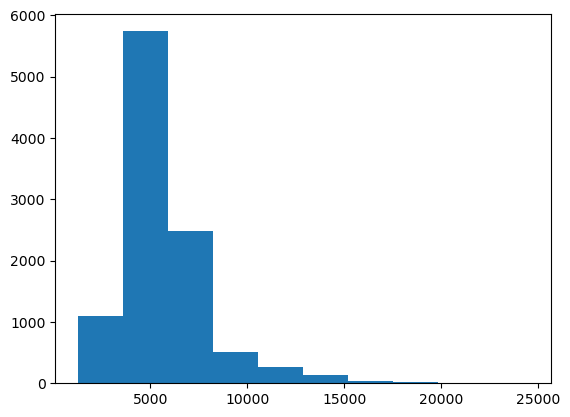

In [767]:
plt.hist(df7.price_per_sqft)

In [792]:
df7[df7.bath>df7.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1630,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5256,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6739,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8449,others,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [798]:
df8=df7[df7.bath<df7.bhk+2]

In [800]:
df8.shape

(10192, 7)

In [802]:
df9=df8.drop(['price_per_sqft','size'],axis=1)

In [836]:
dummies=pd.get_dummies(df9.location)
dummies.head(2)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,others
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [834]:
df10=pd.concat([df9,dummies.drop('others',axis=1)],axis=1)
df10.head(2)

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1st Block Jayanagar,1630.0,3.0,194.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [832]:
df11=df10.drop('location',axis=1)
df11.head(2)

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,194.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [842]:
X=df11.drop('price',axis=1)
y=df11.price

In [858]:
from sklearn.model_selection import train_test_split,cross_val_score
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [906]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [908]:
reg.score(X_test,y_test)

0.8561738379426926

In [910]:
score = cross_val_score(LinearRegression(),X_train,y_train,cv=5)


In [912]:
score.mean()

0.7868486884066277

In [930]:
def predict_price(location,sqft,bath,bhk):
    loc_index= np.where(X.columns==location)[0][0]

    x=np.zeros(len(X.columns))
    x[0]=sqft
    x[1]=bath
    x[2]=bhk
    if loc_index>= 0:
        x[loc_index]=1

    return reg.predict([x])[0]

In [932]:
predict_price('1st Block Jayanagar',1000,3,3)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


188.62140953353986

In [942]:
predict_price('1st Block Jayanagar',1000,3,2)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


194.31487664239978

In [948]:
import pickle

with open('Bengalore_home_price_prediction_model.pickle','wb')as f:
    pickle.dump(reg,f)
    

In [952]:
import json

columns= {
    "data_columns" : [col.lower() for col in X.columns]
}
with open('columns.json',"w")as f:
    f.write(json.dumps(columns))